# YOLOX Weapon Detection Training & Validation Script

### Library Imports

In [3]:
from autogluon.multimodal import MultiModalPredictor
from autogluon.multimodal.presets import get_automm_presets
from autogluon.multimodal.utils import Visualizer
import os
import time
import json
import yaml
import uuid
import torch
import datetime

e:\Programs\miniforge3\envs\ag_workspace\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Set PyTorch Precision

In [4]:
torch.set_float32_matmul_precision('medium')

### Medium Quality Preset Info

In [5]:
hyperparameters, hyperparameter_tune_kwargs = get_automm_presets(problem_type="object_detection", presets="medium_quality")
print(f"hyperparameters: {yaml.dump(hyperparameters, allow_unicode=True, default_flow_style=False)}")
print(f"hyperparameter_tune_kwargs: {json.dumps(hyperparameter_tune_kwargs, sort_keys=True, indent=4)}")

hyperparameters: env.auto_select_gpus: false
env.eval_batch_size_ratio: 1
env.num_gpus: -1
env.num_workers: 2
env.per_gpu_batch_size: 2
env.precision: 32
env.strategy: ddp
model.mmdet_image.checkpoint_name: yolox_l
model.names:
- mmdet_image
optimization.check_val_every_n_epoch: 3
optimization.learning_rate: 5.0e-05
optimization.lr_choice: two_stages
optimization.lr_decay: 0.9
optimization.lr_mult: 100
optimization.max_epochs: 50
optimization.patience: 3
optimization.top_k: 1
optimization.top_k_average_method: best
optimization.val_check_interval: 1.0
optimization.warmup_steps: 0.0

hyperparameter_tune_kwargs: {}


### Set Preset & Save Directory 

In [6]:
presets = "medium_quality"
model_path = f"./tmp/{datetime.datetime.now().timestamp()}-weapon_detection_yolox"

### Set Training and Testing Annotation Path

In [7]:
train_path = "E:\\Current_Workdir\\Portfolios\\Weapon-Object-Detection\\weapon_detection_v13\\Annotations\\train_cocoformat.json"
test_path = "E:\\Current_Workdir\\Portfolios\\Weapon-Object-Detection\\weapon_detection_v13\\Annotations\\test_cocoformat.json"
val_path = "E:\\Current_Workdir\\Portfolios\\Weapon-Object-Detection\\weapon_detection_v13\\Annotations\\val_cocoformat.json"

In [8]:
print(train_path)

E:\Current_Workdir\Portfolios\Weapon-Object-Detection\weapon_detection_v13\Annotations\train_cocoformat.json


### Initiate Model

In [13]:
predictor = MultiModalPredictor(
    problem_type="object_detection",
    sample_data_path=train_path,
    presets=presets,
    path=model_path
)

### Start Training

In [14]:
predictor.fit(train_path, tuning_data=val_path)

Using default root folder: E:\Current_Workdir\Portfolios\Weapon-Object-Detection\weapon_detection_v13\Annotations\... Specify `root=...` if you feel it is wrong...


loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


Using default root folder: E:\Current_Workdir\Portfolios\Weapon-Object-Detection\weapon_detection_v13\Annotations\... Specify `root=...` if you feel it is wrong...


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


Global seed set to 0
AutoMM starts to create your model. ✨

- AutoGluon version is 0.8.2.

- Pytorch version is 1.12.1.

- Model will be saved to "e:\Current_Workdir\Portfolios\Weapon-Object-Detection\tmp\1712574514.638211-weapon_detection_yolox".

- Validation metric is "map".

- To track the learning progress, you can open a terminal and launch Tensorboard:
    ```shell
    # Assume you have installed tensorboard
    tensorboard --logdir e:\Current_Workdir\Portfolios\Weapon-Object-Detection\tmp\1712574514.638211-weapon_detection_yolox
    ```

Enjoy your coffee, and let AutoMM do the job ☕☕☕ Learn more at https://auto.gluon.ai



Loads checkpoint by local backend from path: yolox_l_8x8_300e_coco_20211126_140236-d3bd2b23.pth
The model and loaded state dict do not match exactly

size mismatch for bbox_head.multi_level_conv_cls.0.weight: copying a param with shape torch.Size([80, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([5, 256, 1, 1]).
size mismatch for bbox_head.multi_level_conv_cls.0.bias: copying a param with shape torch.Size([80]) from checkpoint, the shape in current model is torch.Size([5]).
size mismatch for bbox_head.multi_level_conv_cls.1.weight: copying a param with shape torch.Size([80, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([5, 256, 1, 1]).
size mismatch for bbox_head.multi_level_conv_cls.1.bias: copying a param with shape torch.Size([80]) from checkpoint, the shape in current model is torch.Size([5]).
size mismatch for bbox_head.multi_level_conv_cls.2.weight: copying a param with shape torch.Size([80, 256, 1, 1]) from checkpoint, the shape i

1 GPUs are detected, and 1 GPUs will be used.
   - GPU 0 name: NVIDIA GeForce RTX 3060
   - GPU 0 memory: 11.79GB/12.88GB (Free/Total)
CUDA version is 11.6.

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer(val_check_interval=1.0)` was configured so validation will run at the end of the training epoch..
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name              | Type                             | Params
-----------------------------------------------------------------------
0 | model             | MMDetAutoModelForObjectDetection | 54.2 M
1 | validation_metric | MeanAveragePrecision             | 0     
-----------------------------------------------------------------------
54.2 M    Trainable params
0         Non-trainable params
54.2 M    Total params
216.604   Total estimated model params size (MB)


Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]

e:\Programs\miniforge3\envs\ag_workspace\lib\site-packages\torch\functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Epoch 2: 100%|██████████| 3188/3188 [10:49<00:00,  4.91it/s, loss=5, v_num=]   

Epoch 2, global step 129: 'val_map' reached 0.33453 (best 0.33453), saving model to 'e:\\Current_Workdir\\Portfolios\\Weapon-Object-Detection\\tmp\\1712574514.638211-weapon_detection_yolox\\epoch=2-step=129.ckpt' as top 1


Epoch 5: 100%|██████████| 3188/3188 [10:17<00:00,  5.16it/s, loss=4.88, v_num=]

Epoch 5, global step 258: 'val_map' was not in top 1


Epoch 8: 100%|██████████| 3188/3188 [10:36<00:00,  5.01it/s, loss=3.92, v_num=]

Epoch 8, global step 387: 'val_map' reached 0.35013 (best 0.35013), saving model to 'e:\\Current_Workdir\\Portfolios\\Weapon-Object-Detection\\tmp\\1712574514.638211-weapon_detection_yolox\\epoch=8-step=387.ckpt' as top 1


Epoch 11: 100%|██████████| 3188/3188 [10:33<00:00,  5.03it/s, loss=3.75, v_num=]

Epoch 11, global step 516: 'val_map' reached 0.36632 (best 0.36632), saving model to 'e:\\Current_Workdir\\Portfolios\\Weapon-Object-Detection\\tmp\\1712574514.638211-weapon_detection_yolox\\epoch=11-step=516.ckpt' as top 1


Epoch 14: 100%|██████████| 3188/3188 [10:35<00:00,  5.02it/s, loss=3.81, v_num=]

Epoch 14, global step 645: 'val_map' reached 0.39156 (best 0.39156), saving model to 'e:\\Current_Workdir\\Portfolios\\Weapon-Object-Detection\\tmp\\1712574514.638211-weapon_detection_yolox\\epoch=14-step=645.ckpt' as top 1


Epoch 17: 100%|██████████| 3188/3188 [10:31<00:00,  5.05it/s, loss=3.73, v_num=]

Epoch 17, global step 774: 'val_map' reached 0.40854 (best 0.40854), saving model to 'e:\\Current_Workdir\\Portfolios\\Weapon-Object-Detection\\tmp\\1712574514.638211-weapon_detection_yolox\\epoch=17-step=774.ckpt' as top 1


Epoch 20: 100%|██████████| 3188/3188 [10:37<00:00,  5.00it/s, loss=3.79, v_num=]

Epoch 20, global step 903: 'val_map' was not in top 1


Epoch 23: 100%|██████████| 3188/3188 [10:36<00:00,  5.01it/s, loss=3.45, v_num=]

Epoch 23, global step 1032: 'val_map' reached 0.41394 (best 0.41394), saving model to 'e:\\Current_Workdir\\Portfolios\\Weapon-Object-Detection\\tmp\\1712574514.638211-weapon_detection_yolox\\epoch=23-step=1032.ckpt' as top 1


Epoch 26: 100%|██████████| 3188/3188 [10:42<00:00,  4.96it/s, loss=3.53, v_num=]

Epoch 26, global step 1161: 'val_map' reached 0.41878 (best 0.41878), saving model to 'e:\\Current_Workdir\\Portfolios\\Weapon-Object-Detection\\tmp\\1712574514.638211-weapon_detection_yolox\\epoch=26-step=1161.ckpt' as top 1


Epoch 29: 100%|██████████| 3188/3188 [10:45<00:00,  4.94it/s, loss=3.32, v_num=]

Epoch 29, global step 1290: 'val_map' reached 0.44116 (best 0.44116), saving model to 'e:\\Current_Workdir\\Portfolios\\Weapon-Object-Detection\\tmp\\1712574514.638211-weapon_detection_yolox\\epoch=29-step=1290.ckpt' as top 1


Epoch 32: 100%|██████████| 3188/3188 [10:41<00:00,  4.97it/s, loss=3.05, v_num=]

Epoch 32, global step 1419: 'val_map' reached 0.44488 (best 0.44488), saving model to 'e:\\Current_Workdir\\Portfolios\\Weapon-Object-Detection\\tmp\\1712574514.638211-weapon_detection_yolox\\epoch=32-step=1419.ckpt' as top 1


Epoch 33:  10%|█         | 274/2706 [01:01<09:09,  4.42it/s, loss=3.4, v_num=]  

e:\Programs\miniforge3\envs\ag_workspace\lib\site-packages\pytorch_lightning\trainer\call.py:48: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")
AutoMM has created your model 🎉🎉🎉

- To load the model, use the code below:
    ```python
    from autogluon.multimodal import MultiModalPredictor
    predictor = MultiModalPredictor.load("e:\Current_Workdir\Portfolios\Weapon-Object-Detection\tmp\1712574514.638211-weapon_detection_yolox")
    ```

- You can open a terminal and launch Tensorboard to visualize the training log:
    ```shell
    # Assume you have installed tensorboard
    tensorboard --logdir e:\Current_Workdir\Portfolios\Weapon-Object-Detection\tmp\1712574514.638211-weapon_detection_yolox
    ```

- If you are not satisfied with the model, try to increase the training time, 
adjust the hyperparameters (https://auto.gluon.ai/stable/tutorials/multimodal/advanced_topics/customiz

### Inference

In [50]:
predictor = MultiModalPredictor.load("e:\\Current_Workdir\\Portfolios\\Weapon-Object-Detection\\tmp\\1712574514.638211-weapon_detection_yolox")

Load pretrained checkpoint: e:\Current_Workdir\Portfolios\Weapon-Object-Detection\tmp\1712574514.638211-weapon_detection_yolox\model.ckpt


In [51]:
predictor.fit_summary(verbosity=3, show_plot=True)

{'val_map': None, 'training_time': None}

In [52]:
predictor.dump_model(save_path="./model")

'./model'

### Evaluating on Testing Data

In [11]:
predictor.evaluate(test_path)

Using default root folder: E:\Current_Workdir\Portfolios\Weapon-Object-Detection\weapon_detection_v13\Annotations\... Specify `root=...` if you feel it is wrong...


loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
Predicting DataLoader 0:   0%|          | 0/407 [00:00<?, ?it/s]

e:\Programs\miniforge3\envs\ag_workspace\lib\site-packages\torch\functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Predicting DataLoader 0: 100%|██████████| 407/407 [00:33<00:00, 12.30it/s]

A new predictor save path is created.This is to prevent you to overwrite previous predictor saved here.You could check current save path at predictor._save_path.If you still want to use this path, set resume=True
No path specified. Models will be saved in: "AutogluonModels\ag-20240409_065653"



saving file at e:\Current_Workdir\Portfolios\Weapon-Object-Detection\AutogluonModels\ag-20240409_065653\object_detection_result_cache.json
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.58s).
Accumulating evaluation results...
DONE (t=0.12s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.365
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.516
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.404
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.113
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.222
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.368
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.409
 Aver

{'map': 0.36531551933465733,
 'mean_average_precision': 0.36531551933465733,
 'map_50': 0.5155201732486671,
 'map_75': 0.4035172321332702,
 'map_small': 0.11297152696636123,
 'map_medium': 0.22178143273075693,
 'map_large': 0.3681449687884433,
 'mar_1': 0.40899293086296706,
 'mar_10': 0.5057915729524136,
 'mar_100': 0.5081070265571048,
 'mar_small': 0.1653846153846154,
 'mar_medium': 0.3806372549019608,
 'mar_large': 0.5273278124381064}

In [12]:
pred = predictor.predict(test_path)
print(pred)

Using default root folder: E:\Current_Workdir\Portfolios\Weapon-Object-Detection\weapon_detection_v13\Annotations\... Specify `root=...` if you feel it is wrong...


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Predicting DataLoader 0: 100%|██████████| 407/407 [00:27<00:00, 15.02it/s]
                                                 image  \
0    E:\Current_Workdir\Portfolios\Weapon-Object-De...   
1    E:\Current_Workdir\Portfolios\Weapon-Object-De...   
2    E:\Current_Workdir\Portfolios\Weapon-Object-De...   
3    E:\Current_Workdir\Portfolios\Weapon-Object-De...   
4    E:\Current_Workdir\Portfolios\Weapon-Object-De...   
..                                                 ...   
808  E:\Current_Workdir\Portfolios\Weapon-Object-De...   
809  E:\Current_Workdir\Portfolios\Weapon-Object-De...   
810  E:\Current_Workdir\Portfolios\Weapon-Object-De...   
811  E:\Current_Workdir\Portfolios\Weapon-Object-De...   
812  E:\Current_Workdir\Portfolios\Weapon-Object-De...   

                                                bboxes  
0    [{'class': 'gun', 'class_id': 1, 'bbox': [270....  
1    [{'class': 'gun', 'class_i

In [40]:
pred.iloc[2].bboxes

[{'class': 'shotgun',
  'class_id': 4,
  'bbox': [216.56845092773438,
   275.58416748046875,
   302.4824523925781,
   395.729736328125],
  'score': 0.8600308299064636},
 {'class': 'shotgun',
  'class_id': 4,
  'bbox': [4.983612060546875,
   61.489501953125,
   630.8115234375,
   603.5575561523438],
  'score': 0.04913419485092163}]

In [42]:
conf_threshold = 0.5
image_result = pred.iloc[2]
img_path = image_result.image
visualizer = Visualizer(img_path)  # Initialize the Visualizer
out = visualizer.draw_instance_predictions(image_result, conf_threshold=conf_threshold)  # Draw detections
visualized = out.get_image()  # Get the visualized image

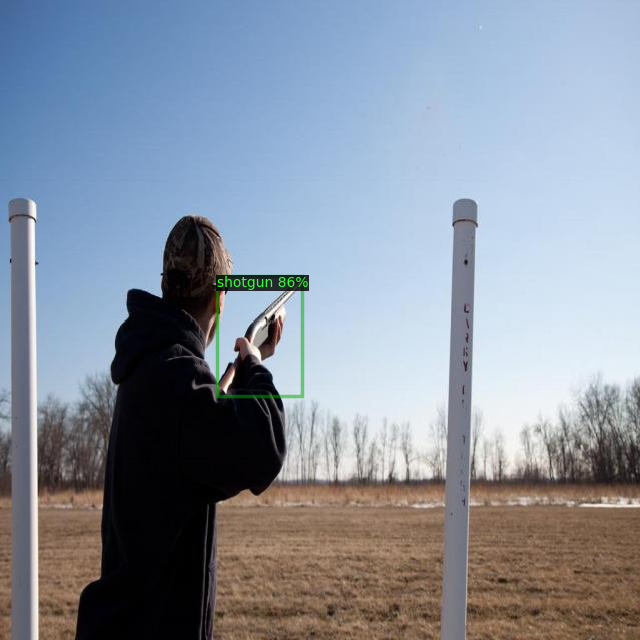

In [43]:
from PIL import Image
from IPython.display import display
img = Image.fromarray(visualized, 'RGB')
display(img)

In [45]:
# Initialize count variable
count_shotgun = 0

# Iterate through each dictionary in the list
for item in pred.iloc[2].bboxes:
    # Check if class is 'motorbike' and score is higher than 0.5
    if item['class'] == 'shotgun' and item['score'] > 0.5:
        # Increment count
        count_shotgun += 1
        # Print bbox
        print("Bounding Box:", item['bbox'])

# Print the count
print("Number of shotgun with score higher than 0.5:", count_shotgun)

Bounding Box: [216.56845092773438, 275.58416748046875, 302.4824523925781, 395.729736328125]
Number of shotgun with score higher than 0.5: 1


## Video Inference

### convert checkpoint to .pth

In [48]:
checkpoint = torch.load("tmp\\1712574514.638211-weapon_detection_yolox\\model.ckpt")
model_state_dict = checkpoint['state_dict']
torch.save(model_state_dict, 'yolox_l_8x8_300e_coco_20211126_140236-d3bd2b23_fine_tuned.pth')